Dataset 1 - Training Accuracy:  100.0
Dataset 1 - Validation Accuracy:  100.0
Dataset 1 - Test Accuracy:  100.0
[[182.   0. 100.]
 [  0. 178. 100.]
 [100. 100. 100.]]


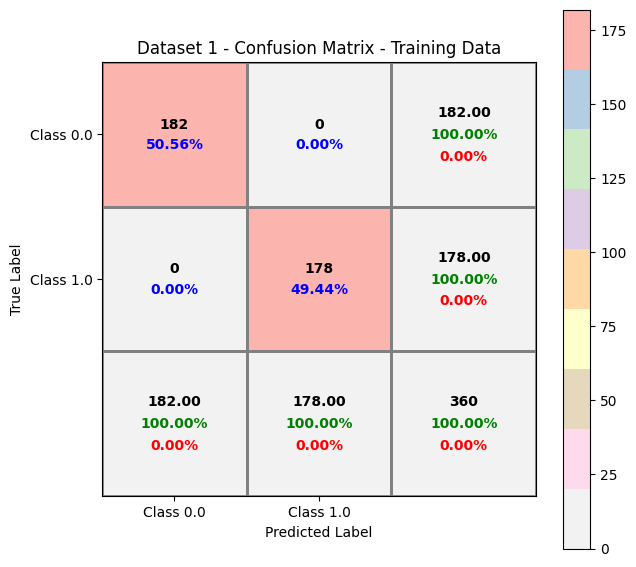

[[ 47.   0. 100.]
 [  0.  43. 100.]
 [100. 100. 100.]]


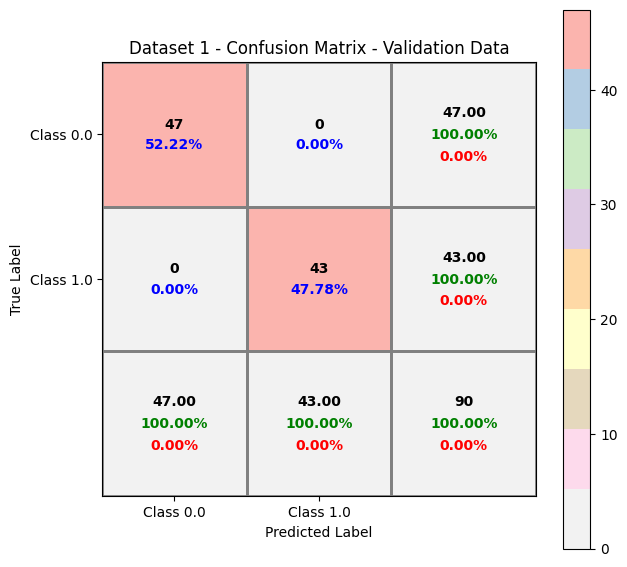

[[ 21.   0. 100.]
 [  0.  29. 100.]
 [100. 100. 100.]]


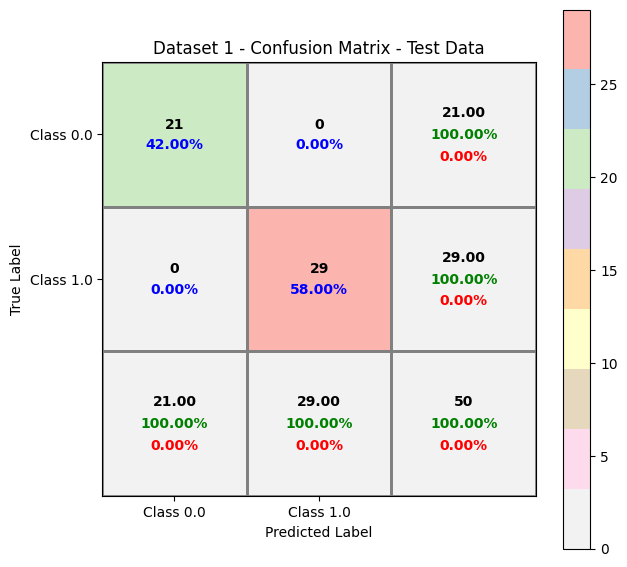

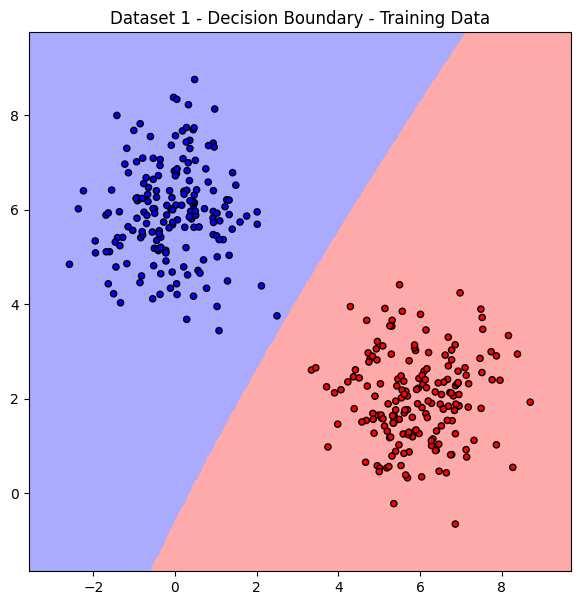

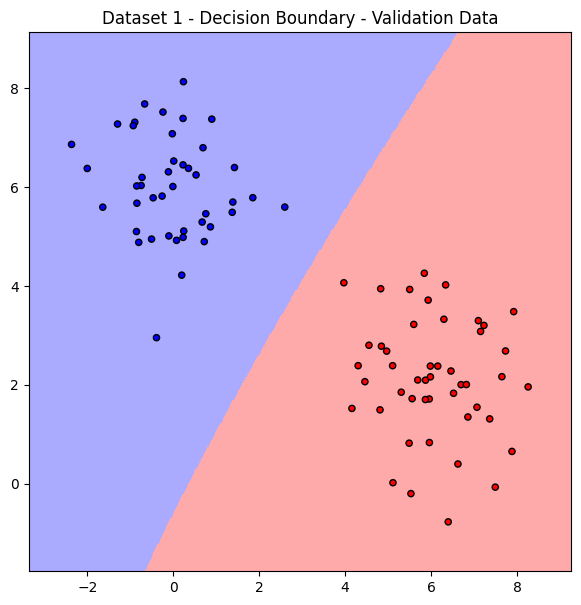

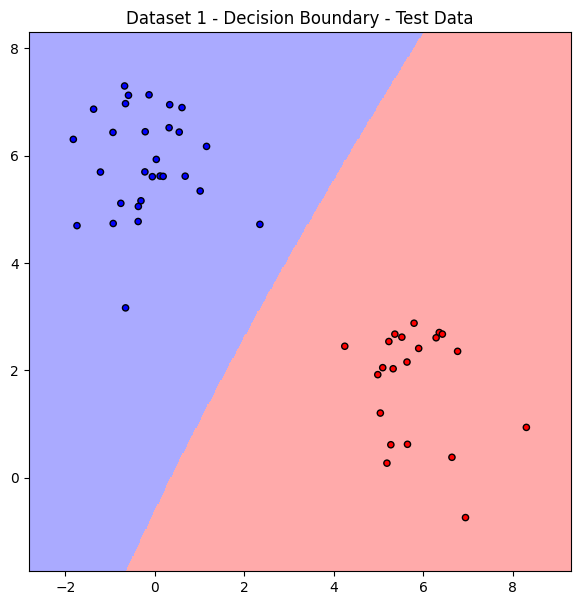

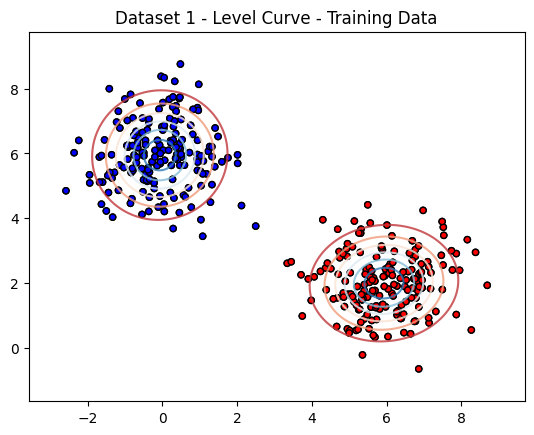

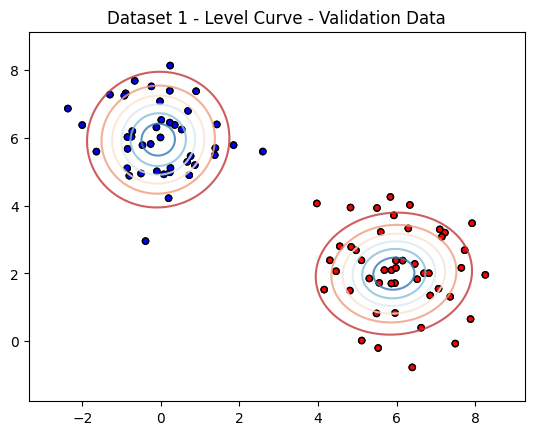

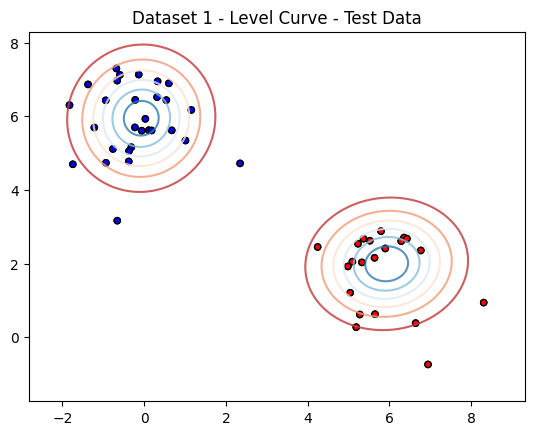

Dataset 2 - Training Accuracy:  71.61520190023754
Dataset 2 - Validation Accuracy:  73.52941176470588
Dataset 2 - Test Accuracy:  70.0
[[321.         114.          71.97309417]
 [125.         282.          71.21212121]
 [ 73.79310345  69.28746929  71.6152019 ]]


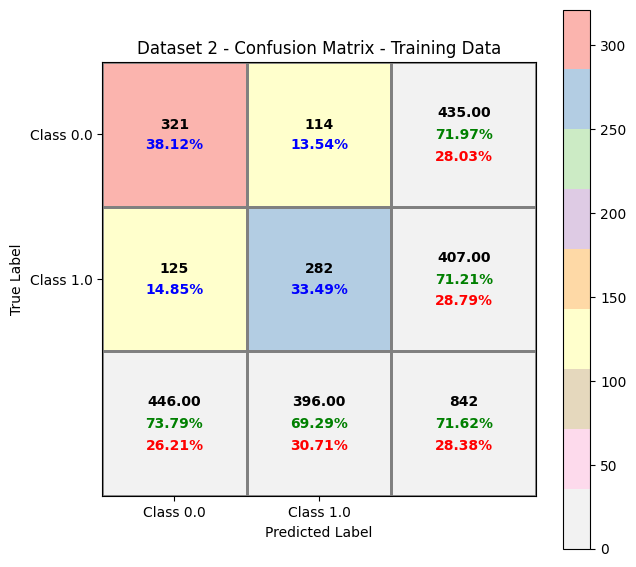

[[82.         26.         68.90756303]
 [37.         93.         78.1512605 ]
 [75.92592593 71.53846154 73.52941176]]


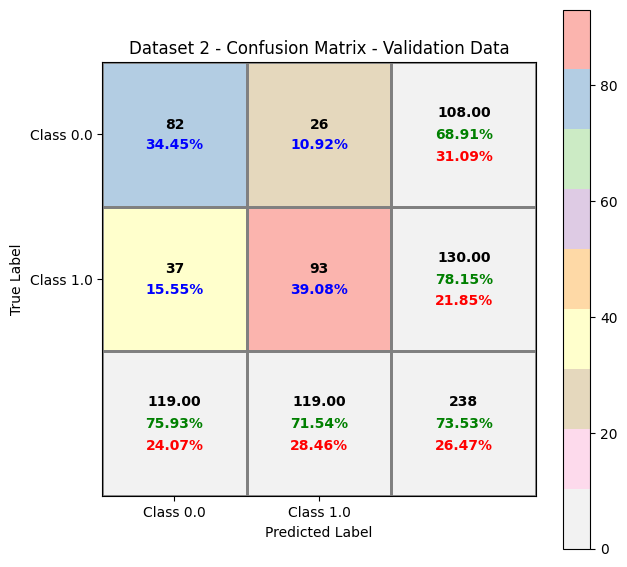

[[50.         18.         73.52941176]
 [18.         34.         65.38461538]
 [73.52941176 65.38461538 70.        ]]


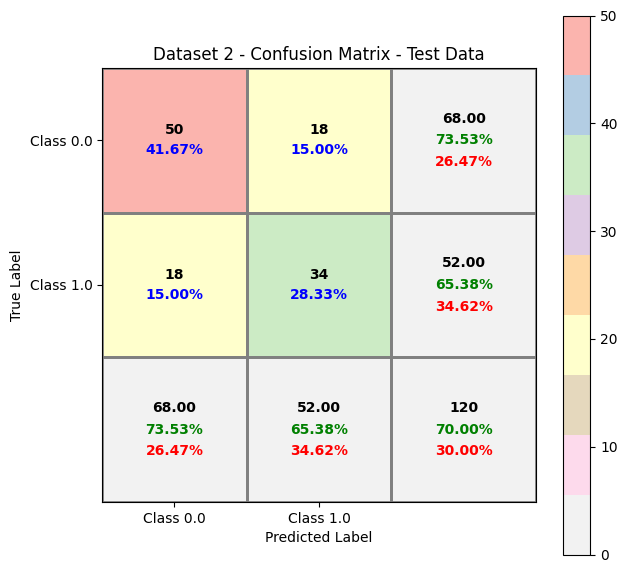

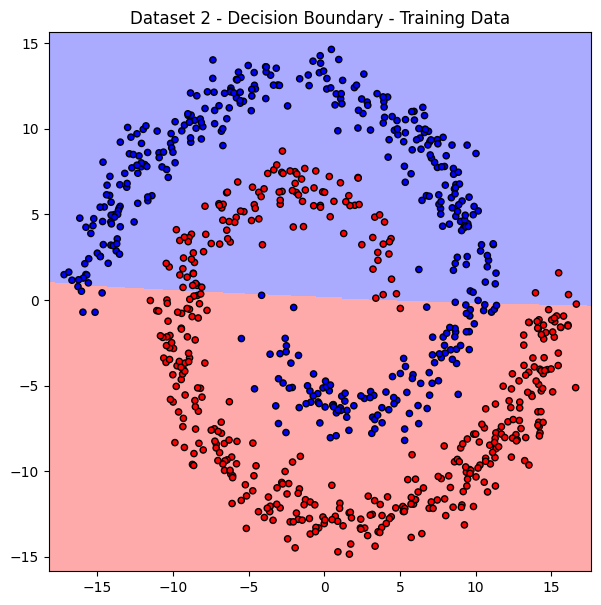

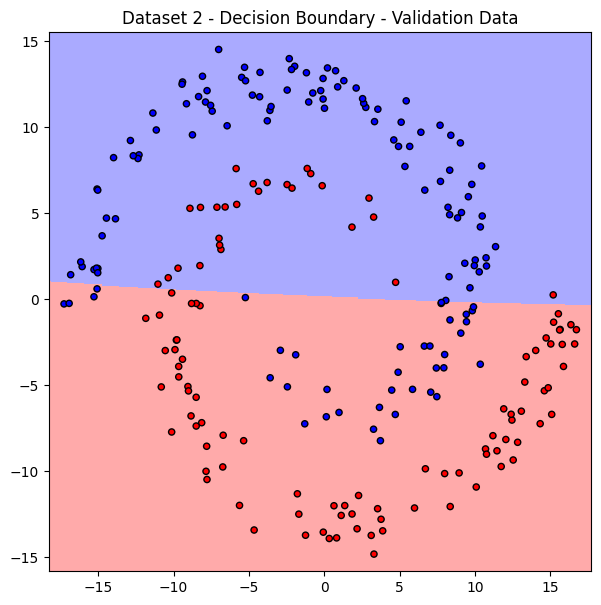

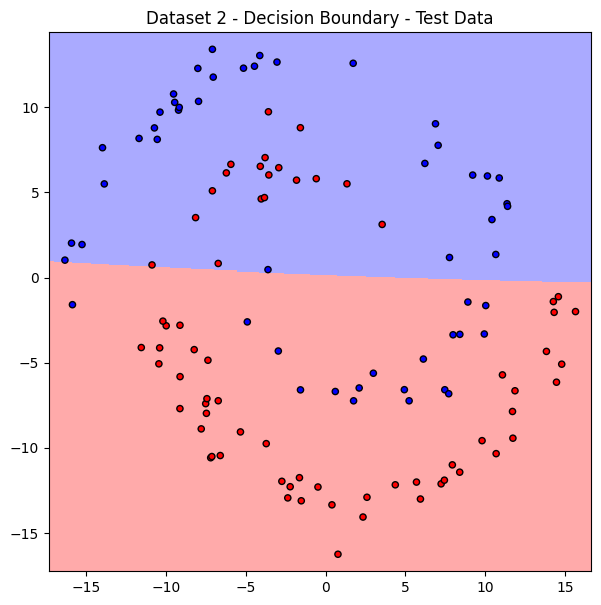

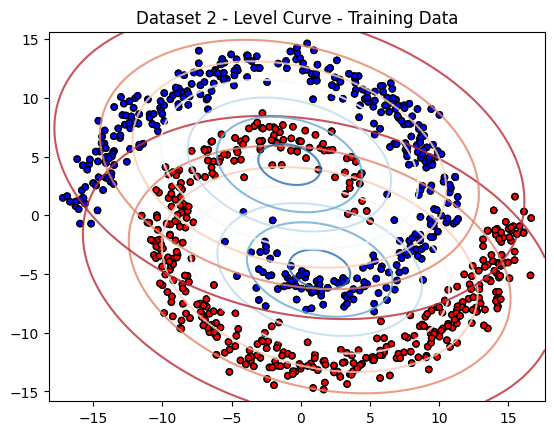

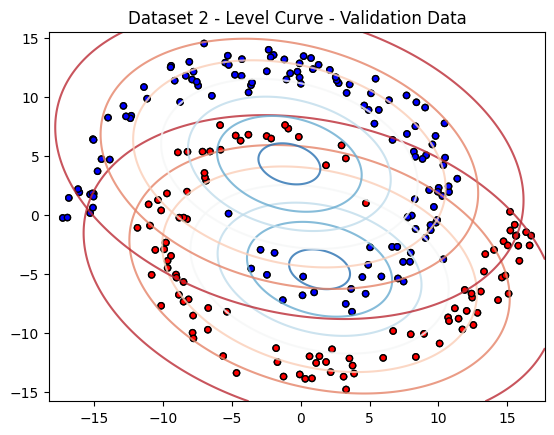

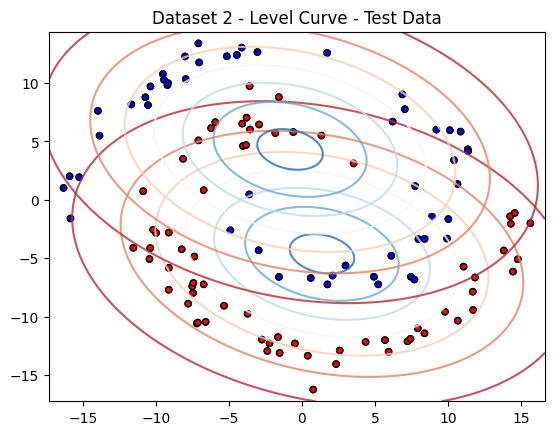

Dataset 3 - Training Accuracy:  90.51157473563876
Dataset 3 - Validation Accuracy:  65.86586586586587
Dataset 3 - Test Accuracy:  63.126252505010015
[[629.          19.          23.          10.          18.
   89.34659091]
 [ 13.         644.          12.           6.          25.
   90.4494382 ]
 [ 19.           7.         627.          29.          18.
   90.21582734]
 [ 20.          13.          20.         638.           9.
   92.59796807]
 [ 23.          29.          13.           6.         629.
   89.98569385]
 [ 89.98569385  92.          89.57142857  91.14285714  89.85714286
   90.51157474]]


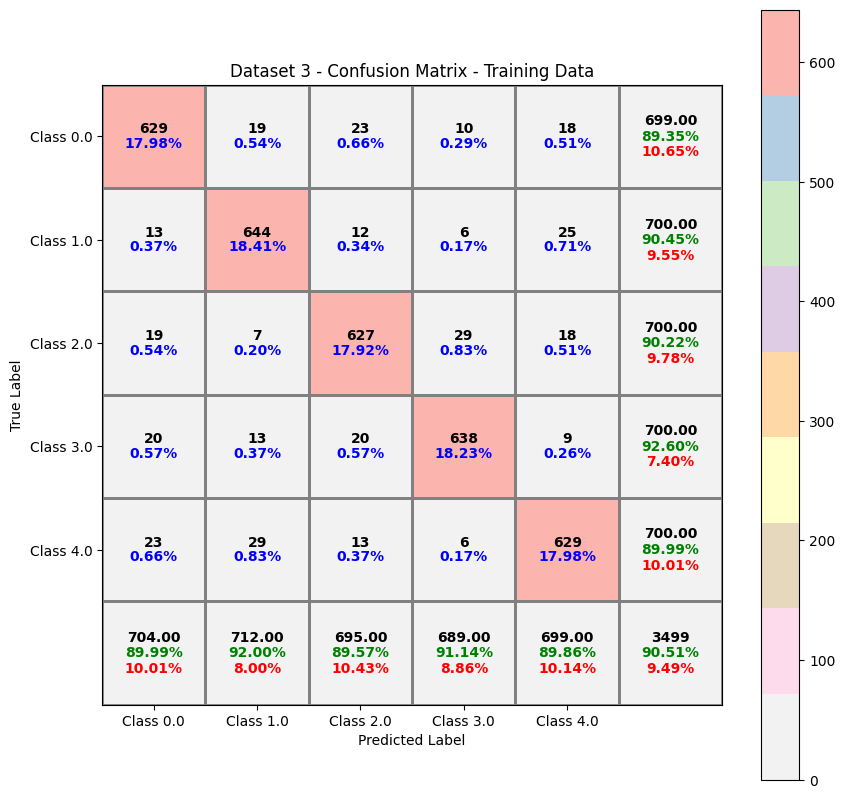

[[143.          13.          15.           5.          23.
   67.77251185]
 [ 14.         124.          13.          19.          30.
   68.13186813]
 [ 12.           6.         145.          26.          11.
   64.15929204]
 [ 24.           6.          31.         129.          10.
   68.25396825]
 [ 18.          33.          22.          10.         117.
   61.2565445 ]
 [ 71.85929648  62.          72.5         64.5         58.5
   65.86586587]]


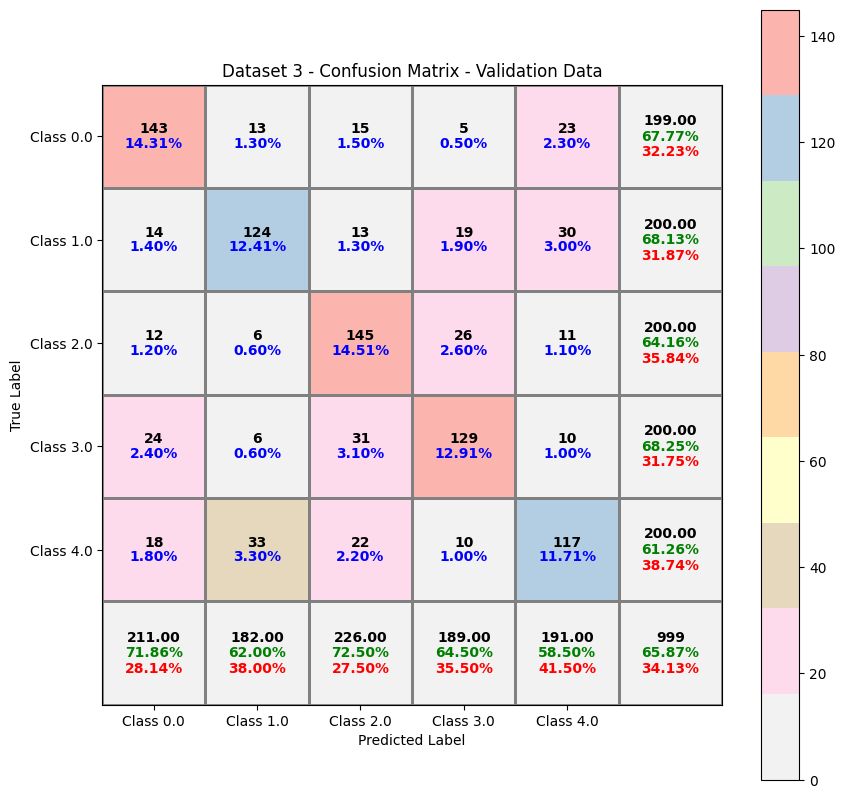

[[73.          5.          9.          3.          9.         72.27722772]
 [ 9.         59.          4.          5.         23.         69.41176471]
 [ 5.          2.         69.         18.          6.         58.97435897]
 [ 5.          7.         22.         56.         10.         62.22222222]
 [ 9.         12.         13.          8.         58.         54.71698113]
 [73.73737374 59.         69.         56.         58.         63.12625251]]


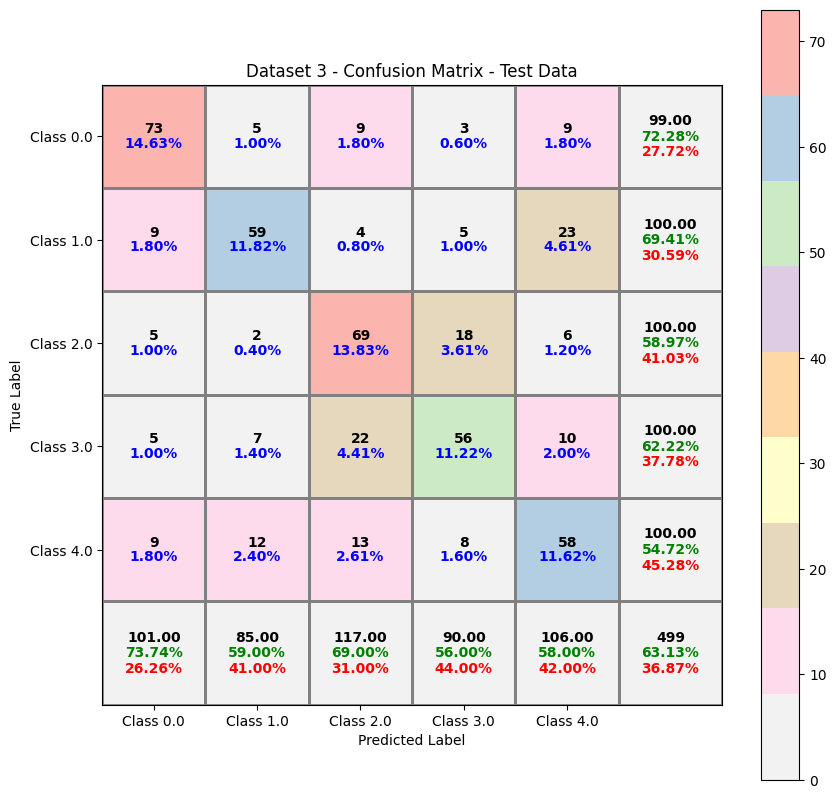

In [24]:
"""
Task 2. 
    Input -
        Datasets_for_A1 folder needs to be in the current working 
        directory with the folder structure as 
        Datasets_for_A1/Regression/Dataset <dataset number>/<team number>/
        Replace <team number> with the actual number.
        e.g. Datasets_for_A1/Regression/Dataset 1/9/
    Output -
        Bayes classifier with a Gaussian distribution for each class
            Covariance matrix for all the classes is the same
        Presentation of Results:
            1. Table of classification accuracies of the model on training 
            data and validation data for different values of hyperparameter
            2. Classification accuracy of the best configuration of the 
            model on test data
            3. Confusion matrix for the best configuration of the model,
            on training data and test data
            4. Decision region plots for the best configuration of the model,
            for Datasets 1 and 2. Superpose the training data on the decision
            region plot. For the Bayes classifiers and naive-Bayes classifiers,
            superpose the plots of level curves on the training data.
"""

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


class BayesianClassifier:
    def fit(self, X_train, y_train):
        self.classes = np.unique(y_train)
        class_counts = []
        for cls in self.classes:
            count = np.sum(y_train == cls)
            class_counts.append(count)
        total_samples = len(y_train)
        self.class_priors = np.array(class_counts) / total_samples
        class_data = []
        for cls in self.classes:
            data = X_train[y_train == cls]
            class_data.append(data)

        self.class_means = []
        for class_ in class_data:
            mean_vector = np.mean(class_, axis=0)
            self.class_means.append(mean_vector)

        self.class_covs = []
        for class_ in class_data:
            cov_matrix = np.cov(class_.T)
            self.class_covs.append(cov_matrix)
        average_cov_matrix = np.mean(self.class_covs, axis=0)
        for class_ in class_data:
            self.class_covs.append(average_cov_matrix)

    def predict(self, X_test):
        likelihoods = []
        for class_mean, class_cov in zip(self.class_means, self.class_covs):
            likelihood = self.calculate_likelihood(X_test, class_mean, class_cov)
            likelihoods.append(likelihood)
        likelihoods = np.array(likelihoods)

        evidence = np.zeros(X_test.shape[0])
        for i in range(len(self.classes)):
            evidence += likelihoods[i] * self.class_priors[i]
        posteriors = likelihoods * self.class_priors[:, np.newaxis] / evidence
        # print("posteriors",posteriors)
        # print("np.argmax(posteriors, axis=0)",np.argmax(posteriors, axis=0))
        return np.argmax(posteriors, axis=0)

    def calculate_likelihood(self, X, class_mean, class_cov):
        d = X.shape[1]
        constant = 1 / ((2 * np.pi) ** (d / 2) * np.sqrt(np.linalg.det(class_cov)))
        mean_diff = X - class_mean
        exponent = -0.5 * np.sum(
            np.dot(mean_diff, np.linalg.inv(class_cov)) * mean_diff, axis=1
        )
        return constant * np.exp(exponent)


def custom_unique(input_array):
    unique_list = []
    for item in input_array:
        if item not in unique_list:
            unique_list.append(item)
    return np.array(unique_list)


def custom_mean(input_array):
    return sum(input_array) / len(input_array)


def custom_covariance_matrix(X):
    mean_vector = custom_mean(X)
    centered_data = X - mean_vector
    covariance_matrix = np.dot(centered_data.T, centered_data) / (X.shape[0] - 1)
    return covariance_matrix


def custom_std(feature):
    mean = np.mean(feature)
    squared_diff = np.square(feature - mean)
    variance = np.mean(squared_diff)
    std = np.sqrt(variance)
    return std


def accuracy_score(y_true, y_pred):
    if len(y_true) != len(y_pred):
        raise ValueError("Number of true labels and predicted labels must be the same.")
    correct = sum(1 for true, pred in zip(y_true, y_pred) if true == pred)
    total = len(y_true)
    accuracy = correct / total
    return accuracy


def confusion_matrix(y_true, y_pred, accuracy, labels=None):
    if labels is None:
        labels = np.unique(np.concatenate((y_true, y_pred)))
    num_labels = len(labels)
    cm = np.zeros((num_labels + 1, num_labels + 1), float)
    label_to_index = {label: i for i, label in enumerate(labels)}
    true_positives = np.zeros(num_labels)
    pred_positives = np.zeros(num_labels)
    total_samples = len(y_true)
    for true, pred in zip(y_true, y_pred):
        true_index = label_to_index[true]
        pred_index = label_to_index[pred]
        cm[true_index, pred_index] += 1
        true_positives[true_index] += 1 if true == pred else 0
        pred_positives[pred_index] += 1 if true == pred else 0
    accuracy = np.sum(np.diag(cm)) / total_samples
    cm[-1, :-1] = (true_positives / np.sum(cm[:-1, :-1], axis=1)) * 100
    cm[:-1, -1] = (pred_positives / np.sum(cm[:-1, :-1], axis=0)) * 100
    cm[-1, -1] = accuracy * 100
    return cm


def plot_confusion_matrix(y_true, y_pred, accuracy, title):
    cm = confusion_matrix(y_true, y_pred, accuracy)
    cm_backup = confusion_matrix(y_true, y_pred, accuracy)
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            if i == cm.shape[0] - 1 or j == cm.shape[1] - 1:
                cm[i, j] = 0.0
    number_of_classes = len(np.unique(y_true))
    plt.figure(figsize=(number_of_classes + 5, number_of_classes + 5))
    plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Pastel1_r)
    cm = cm_backup
    plt.title(title)
    plt.colorbar()
    labels = []
    for i in np.unique(y_true):
        label = "Class " + str(i)
        labels.append(label)
    plt.xticks(range(len(np.unique(y_true))), labels=labels)
    plt.yticks(range(len(np.unique(y_true))), labels=labels)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")

    cm_except_last_row_col = cm[:-1, :-1]
    cm_row_sum = np.sum(cm_except_last_row_col, axis=1)
    cm_col_sum = np.sum(cm_except_last_row_col, axis=0)

    thresh = cm.max() / 2.0
    for i in range(cm.shape[0]):
        row_sum = 0
        for j in range(cm.shape[1]):
            if i == cm.shape[0] - 1 and j == cm.shape[1] - 1:
                plt.text(
                    j,
                    i - 0.15,
                    format(y_true.size, "d"),
                    ha="center",
                    va="center",
                    fontweight="bold",
                    color="black",
                )
                plt.text(
                    j,
                    i,
                    format(cm[i, j], ".2f") + "%",
                    ha="center",
                    va="center",
                    fontweight="bold",
                    color="green",
                )
                plt.text(
                    j,
                    i + 0.15,
                    format(100 - cm[i, j], ".2f") + "%",
                    ha="center",
                    va="center",
                    fontweight="bold",
                    color="red",
                )
                rect = plt.Rectangle(
                    (j - 0.5, i - 0.5), 1, 1, fill=False, edgecolor="grey", linewidth=2
                )
                plt.gca().add_patch(rect)
            elif j == cm.shape[1] - 1:
                plt.text(
                    j,
                    i - 0.15,
                    format(cm_row_sum[i], ".2f"),
                    ha="center",
                    va="center",
                    fontweight="bold",
                    color="black",
                )
                plt.text(
                    j,
                    i,
                    format(cm[i, j], ".2f") + "%",
                    ha="center",
                    va="center",
                    fontweight="bold",
                    color="green",
                )
                plt.text(
                    j,
                    i + 0.15,
                    format(100 - cm[i, j], ".2f") + "%",
                    ha="center",
                    va="center",
                    fontweight="bold",
                    color="red",
                )
                rect = plt.Rectangle(
                    (j - 0.5, i - 0.5), 1, 1, fill=False, edgecolor="grey", linewidth=2
                )
                plt.gca().add_patch(rect)
            elif i == cm.shape[0] - 1:
                plt.text(
                    j,
                    i - 0.15,
                    format(cm_col_sum[j], ".2f"),
                    ha="center",
                    va="center",
                    fontweight="bold",
                    color="black",
                )
                plt.text(
                    j,
                    i,
                    format(cm[i, j], ".2f") + "%",
                    ha="center",
                    va="center",
                    fontweight="bold",
                    color="green",
                )
                plt.text(
                    j,
                    i + 0.15,
                    format(100 - cm[i, j], ".2f") + "%",
                    ha="center",
                    va="center",
                    fontweight="bold",
                    color="red",
                )
                rect = plt.Rectangle(
                    (j - 0.5, i - 0.5), 1, 1, fill=False, edgecolor="grey", linewidth=2
                )
                plt.gca().add_patch(rect)
            else:
                percent = (cm[i, j] / y_true.size) * 100
                plt.text(
                    j,
                    i - 0.07,
                    format(int(cm[i, j]), "d"),
                    ha="center",
                    va="center",
                    fontweight="bold",
                    color="black",
                )
                plt.text(
                    j,
                    i + 0.07,
                    format(percent, ".2f") + "%",
                    ha="center",
                    va="center",
                    fontweight="bold",
                    color="blue",
                )
                rect = plt.Rectangle(
                    (j - 0.5, i - 0.5), 1, 1, fill=False, edgecolor="grey", linewidth=2
                )
                plt.gca().add_patch(rect)

    plt.grid(False)
    plot_title = title
    current_directory = os.getcwd()
    os.makedirs(current_directory+"/cls_2a", exist_ok=True)
    plt.savefig(current_directory+"/cls_2a/"+plot_title+'.png')
    plt.show()


def plot_decision_boundary(x, y, classifier, title):
    N = 500

    x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
    y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
    x_range = np.linspace(x_min, x_max, N)
    y_range = np.linspace(y_min, y_max, N)
    xx, yy = np.meshgrid(x_range, y_range)

    Z_list = []

    for point in np.c_[xx.ravel(), yy.ravel()]:
        prediction = classifier.predict(np.array([point]))
        Z_list.append(prediction)

    Z = np.array(Z_list)

    Z = Z.reshape(xx.shape)

    cmap_light = ListedColormap(["#FFAAAA", "#AAFFAA", "#AAAAFF"])
    number_of_classes = len(np.unique(y))
    plt.figure(figsize=(number_of_classes + 5, number_of_classes + 5))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    plt.scatter(
        x[:, 0],
        x[:, 1],
        c=y,
        cmap=ListedColormap(["#FF0000", "#00FF00", "#0000FF"]),
        edgecolors="k",
        s=20,
    )
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(title)
    plot_title=title
    current_directory = os.getcwd()
    os.makedirs(current_directory+"/cls_2a", exist_ok=True)
    plt.savefig(current_directory+"/cls_2a/"+plot_title+'.png')
    plt.show()


def plot_level_curve(X, y, classifier, title):
    N = 1000

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    x_range = np.linspace(x_min, x_max, N)
    y_range = np.linspace(y_min, y_max, N)
    xx, yy = np.meshgrid(x_range, y_range)

    pos = np.dstack((xx, yy))

    cmap_light = ListedColormap(["#FFAAAA", "#AAFFAA", "#AAAAFF"])

    means = classifier.class_means
    covs = classifier.class_covs
    for mean, cov in zip(means, covs):
        Z = np.exp(
            -0.5 * np.sum((pos - mean) @ np.linalg.inv(cov) * (pos - mean), axis=2)
        ) / (2 * np.pi * np.sqrt(np.linalg.det(cov)))

        plt.contour(xx, yy, Z, cmap=plt.cm.RdBu, alpha=0.8)
        plt.scatter(
            X[:, 0],
            X[:, 1],
            c=y,
            cmap=ListedColormap(["#FF0000", "#00FF00", "#0000FF"]),
            edgecolors="k",
            s=20,
        )
        plt.xlim(xx.min(), xx.max())
        plt.ylim(yy.min(), yy.max())
        plt.title(title)
        plot_title=title
        current_directory = os.getcwd()
        os.makedirs(current_directory+"/cls_2a", exist_ok=True)
        plt.savefig(current_directory+"/cls_2a/"+plot_title+'.png')
    plt.show()


def read_dataset_1(current_directory, folder_number):
    regression_dataset_1_path=current_directory+ "/Datasets_for_A1/Classification/Dataset 1/" + folder_number + "/"
    # regression_dataset_1_path = (
    #     "/home/dipendu/programs/mtech_2023/ml/ass1/Datasets_for_A1/Classification/Dataset 1/"
    #     + folder_number
    #     + "/"
    # )

    regression_dataset_1_Train = (
        regression_dataset_1_path + "Train-" + folder_number + ".csv"
    )
    df = pd.read_csv(regression_dataset_1_Train)
    data = df.to_numpy()
    train_x = data[:, 1:3]
    train_y = data[:, 3]

    regression_dataset_1_Validation = (
        regression_dataset_1_path + "Val-" + folder_number + ".csv"
    )
    df = pd.read_csv(regression_dataset_1_Validation)
    data = df.to_numpy()
    val_x = data[:, 1:3]
    val_y = data[:, 3]

    regression_dataset_1_Test = (
        regression_dataset_1_path + "Test-" + folder_number + ".csv"
    )
    df = pd.read_csv(regression_dataset_1_Test)
    data = df.to_numpy()
    test_x = data[:, 1:3]
    test_y = data[:, 3]

    return train_x, train_y, val_x, val_y, test_x, test_y


def read_dataset_2(current_directory, folder_number):
    regression_dataset_2_path=current_directory+ "/Datasets_for_A1/Classification/Dataset 2/" + folder_number + "/"
    # regression_dataset_2_path = (
    #     "/home/dipendu/programs/mtech_2023/ml/ass1/Datasets_for_A1/Classification/Dataset 2/"
    #     + folder_number
    #     + "/"
    # )

    regression_dataset_2_Train = (
        regression_dataset_2_path + "Train-" + folder_number + ".csv"
    )
    df = pd.read_csv(regression_dataset_2_Train)
    data = df.to_numpy()
    train_x = data[:, 1:3]
    train_y = data[:, 3]

    regression_dataset_2_Validation = (
        regression_dataset_2_path + "Val-" + folder_number + ".csv"
    )
    df = pd.read_csv(regression_dataset_2_Validation)
    data = df.to_numpy()
    val_x = data[:, 1:3]
    val_y = data[:, 3]

    regression_dataset_2_Test = (
        regression_dataset_2_path + "Test-" + folder_number + ".csv"
    )
    df = pd.read_csv(regression_dataset_2_Test)
    data = df.to_numpy()
    test_x = data[:, 1:3]
    test_y = data[:, 3]

    return train_x, train_y, val_x, val_y, test_x, test_y


def read_dataset_3(current_directory, folder_number):
    regression_dataset_3_path=current_directory+ "/Datasets_for_A1/Classification/Dataset 3/" + folder_number + "/"
    # regression_dataset_3_path = (
    #     "/home/dipendu/programs/mtech_2023/ml/ass1/Datasets_for_A1/Classification/Dataset 3/"
    #     + folder_number
    #     + "/"
    # )

    regression_dataset_3_Train_data = regression_dataset_3_path + "train_data.csv"
    df = pd.read_csv(regression_dataset_3_Train_data)
    data = df.to_numpy()
    train_x = data

    regression_dataset_3_Train_label = regression_dataset_3_path + "train_label.csv"
    df = pd.read_csv(regression_dataset_3_Train_label)
    data = df.to_numpy()
    train_y = data[:, 0]

    regression_dataset_3_Validation_data = regression_dataset_3_path + "val_data.csv"
    df = pd.read_csv(regression_dataset_3_Validation_data)
    data = df.to_numpy()
    val_x = data

    regression_dataset_3_Validation_label = regression_dataset_3_path + "val_label.csv"
    df = pd.read_csv(regression_dataset_3_Validation_label)
    data = df.to_numpy()
    val_y = data[:, 0]

    regression_dataset_3_Test_data = regression_dataset_3_path + "test_data.csv"
    df = pd.read_csv(regression_dataset_3_Test_data)
    data = df.to_numpy()
    test_x = data

    regression_dataset_3_Test_label = regression_dataset_3_path + "test_label.csv"
    df = pd.read_csv(regression_dataset_3_Test_label)
    data = df.to_numpy()
    test_y = data[:, 0]

    return train_x, train_y, val_x, val_y, test_x, test_y


def generate_random_data():
    # Generate synthetic data
    np.random.seed(0)
    X_train = np.random.randn(300, 2)
    y_train = np.concatenate([np.zeros(150), np.ones(150)])

    X_val = np.random.randn(100, 2)
    y_val = np.concatenate([np.zeros(50), np.ones(50)])

    X_test = np.random.randn(100, 2)
    y_test = np.concatenate([np.zeros(50), np.ones(50)])

    return X_train, y_train, X_val, y_val, X_test, y_test


def apply_bayes_classifier_same_cov(
    train_x, train_y, val_x, val_y, test_x, test_y, dataset
):
    classifier = BayesianClassifier()
    classifier.fit(train_x, train_y)

    train_y_pred = classifier.predict(train_x)
    val_y_pred = classifier.predict(val_x)
    test_y_pred = classifier.predict(test_x)

    train_accuracy = accuracy_score(train_y, train_y_pred) * 100
    val_accuracy = accuracy_score(val_y, val_y_pred) * 100
    test_accuracy = accuracy_score(test_y, test_y_pred) * 100

    print(dataset, "- Training Accuracy: ", train_accuracy)
    print(dataset, "- Validation Accuracy: ", val_accuracy)
    print(dataset, "- Test Accuracy: ", test_accuracy)

    plot_confusion_matrix(
        train_y,
        train_y_pred,
        train_accuracy,
        title=dataset + " - Confusion Matrix - Training Data",
    )
    plot_confusion_matrix(
        val_y,
        val_y_pred,
        val_accuracy,
        title=dataset + " - Confusion Matrix - Validation Data",
    )
    plot_confusion_matrix(
        test_y,
        test_y_pred,
        test_accuracy,
        title=dataset + " - Confusion Matrix - Test Data",
    )

    if dataset != "Dataset 3":
        plot_decision_boundary(
            train_x,
            train_y,
            classifier,
            dataset + " - Decision Boundary - Training Data",
        )
        plot_decision_boundary(
            val_x, val_y, classifier, dataset + " - Decision Boundary - Validation Data"
        )
        plot_decision_boundary(
            test_x, test_y, classifier, dataset + " - Decision Boundary - Test Data"
        )

        plot_level_curve(
            train_x, train_y, classifier, dataset + " - Level Curve - Training Data"
        )
        plot_level_curve(
            val_x, val_y, classifier, dataset + " - Level Curve - Validation Data"
        )
        plot_level_curve(
            test_x, test_y, classifier, dataset + " - Level Curve - Test Data"
        )


def main():
    # train_x, train_y, val_x, val_y, test_x, test_y = generate_random_data()

    folder_number = "18"
    current_directory = os.getcwd()

    train_x, train_y, val_x, val_y, test_x, test_y = read_dataset_1(
        current_directory, folder_number
    )
    apply_bayes_classifier_same_cov(
        train_x, train_y, val_x, val_y, test_x, test_y, "Dataset 1"
    )

    train_x, train_y, val_x, val_y, test_x, test_y = read_dataset_2(
        current_directory, folder_number
    )
    apply_bayes_classifier_same_cov(
        train_x, train_y, val_x, val_y, test_x, test_y, "Dataset 2"
    )

    train_x, train_y, val_x, val_y, test_x, test_y = read_dataset_3(
        current_directory, folder_number
    )
    apply_bayes_classifier_same_cov(
        train_x, train_y, val_x, val_y, test_x, test_y, "Dataset 3"
    )


if __name__ == "__main__":
    main()